In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
# imporint dataset from google drive

file_path = "/content/drive/MyDrive/US_Accidents_March23_sampled_500k.csv"

#data set can be directly loaded

#df = pd.read_csv('US_Accidents_March23_sampled_500k.csv')

df = pd.read_csv(file_path)
df.shape
df.head()

print(df.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                279623 non-null  float64
 8   End_Lng                279623 non-null  float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            499999 non-null  object 
 11  Street                 499309 non-null  object 
 12  City                   499981 non-null  object 
 13  County                 500000 non-null  object 
 14  State                  500000 non-nu

In [79]:
print(df.describe())


            Severity      Start_Lat      Start_Lng        End_Lat  \
count  500000.000000  500000.000000  500000.000000  279623.000000   
mean        2.212748      36.206421     -94.736583      36.273192   
std         0.486661       5.071411      17.405761       5.265333   
min         1.000000      24.562117    -124.497420      24.570110   
25%         2.000000      33.416823    -117.233047      33.474773   
50%         2.000000      35.832147     -87.794365      36.192669   
75%         2.000000      40.082443     -80.359601      40.181341   
max         4.000000      48.999569     -67.484130      48.998901   

             End_Lng   Distance(mi)  Temperature(F)  Wind_Chill(F)  \
count  279623.000000  500000.000000   489534.000000  370983.000000   
mean      -95.776553       0.564317       61.646254      58.229028   
std        18.120211       1.774872       19.000133      22.352246   
min      -124.497419       0.000000      -77.800000     -53.200000   
25%      -117.778324       0

In [127]:
#checking for any duplication
df.duplicated().sum()

np.int64(0)

In [128]:
# Checking for missing values
print(df.isnull().sum())

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  220377
End_Lng                  220377
Distance(mi)                  0
Description                   1
Street                      691
City                         19
County                        0
State                         0
Zipcode                     116
Country                       0
Timezone                    507
Airport_Code               1446
Weather_Timestamp          7674
Temperature(F)            10466
Wind_Chill(F)            129017
Humidity(%)               11130
Pressure(in)               8928
Visibility(mi)            11291
Wind_Direction            11197
Wind_Speed(mph)           36987
Precipitation(in)        142616
Weather_Condition         11101
Amenity                       0
Bump                          0
Crossing

In [129]:
# Make a list of features that have NaN values
features_with_na = [features for features in df.columns if df[features].isnull().sum() > 0]

# Calculate the percentage of missing values for each feature
missing_percent = df[features_with_na].isnull().sum().sort_values(ascending=False) / len(df) * 100

print(missing_percent)



End_Lat                  44.0754
End_Lng                  44.0754
Precipitation(in)        28.5232
Wind_Chill(F)            25.8034
Wind_Speed(mph)           7.3974
Visibility(mi)            2.2582
Wind_Direction            2.2394
Humidity(%)               2.2260
Weather_Condition         2.2202
Temperature(F)            2.0932
Pressure(in)              1.7856
Weather_Timestamp         1.5348
Sunrise_Sunset            0.2966
Civil_Twilight            0.2966
Nautical_Twilight         0.2966
Astronomical_Twilight     0.2966
Airport_Code              0.2892
Street                    0.1382
Timezone                  0.1014
Zipcode                   0.0232
City                      0.0038
Description               0.0002
dtype: float64


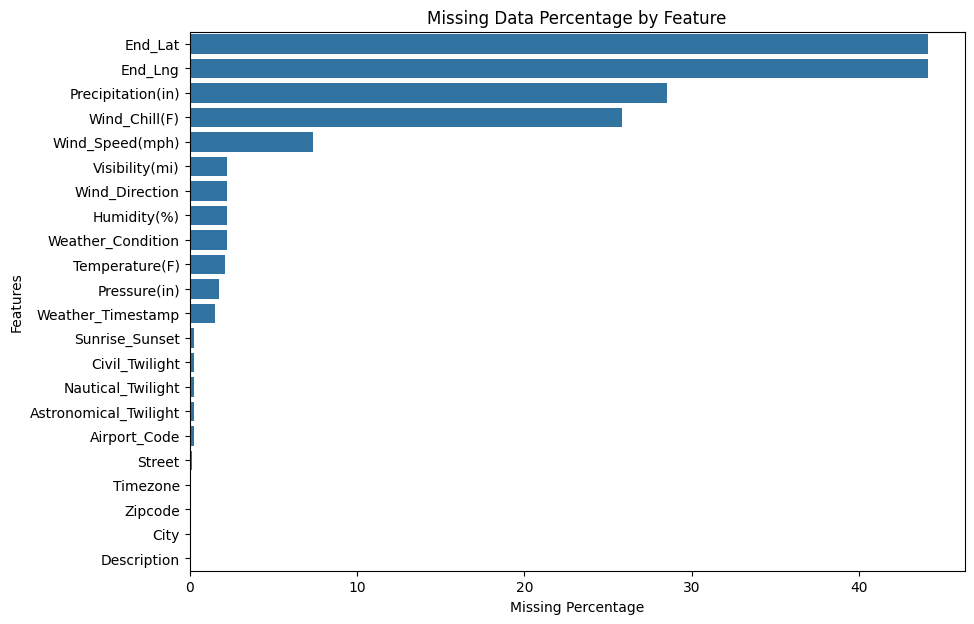

In [130]:
# Plot the missing percentages for all features
plt.figure(figsize=(10, 7))
sns.barplot(x=missing_percent.values, y=missing_percent.index)
plt.xlabel('Missing Percentage')
plt.ylabel('Features')
plt.title('Missing Data Percentage by Feature')
plt.show()

In [131]:
selected_cols = [
    'Severity',
    'Weather_Condition',
    'Visibility(mi)',
    'Temperature(F)',
    'Humidity(%)',
    'Precipitation(in)',
    'Wind_Speed(mph)',
    'Wind_Direction',
    'Start_Time',
    'Sunrise_Sunset',
    'State',
    'City'
]

df = df[selected_cols]

In [132]:
# Select the columns
df = df[selected_cols]

# Look at the first few rows
print(df.head())

# Check missing data for these columns
print(df.isnull().sum())

   Severity Weather_Condition  Visibility(mi)  Temperature(F)  Humidity(%)  \
0         2              Fair            10.0            77.0         62.0   
1         2              Fair            10.0            45.0         48.0   
2         2              Fair            10.0            68.0         73.0   
3         2        Wintry Mix            10.0            27.0         86.0   
4         2              Fair            10.0            42.0         34.0   

   Precipitation(in)  Wind_Speed(mph) Wind_Direction  \
0                0.0              5.0             NW   
1                0.0              5.0              W   
2                0.0             13.0              W   
3                0.0             15.0            ENE   
4                0.0              0.0           CALM   

                      Start_Time Sunrise_Sunset State         City  
0            2019-06-12 10:10:56            Day    LA      Zachary  
1  2022-12-03 23:37:14.000000000          Night    VA   

In [133]:


# Make a list of features that have NaN values
features_with_na = [features for features in df.columns if df[features].isnull().sum() > 0]

# Calculate the percentage of missing values for each feature
missing_percent = df[features_with_na].isnull().sum().sort_values(ascending=False) / len(df) * 100

print(missing_percent)

Precipitation(in)    28.5232
Wind_Speed(mph)       7.3974
Visibility(mi)        2.2582
Wind_Direction        2.2394
Humidity(%)           2.2260
Weather_Condition     2.2202
Temperature(F)        2.0932
Sunrise_Sunset        0.2966
City                  0.0038
dtype: float64


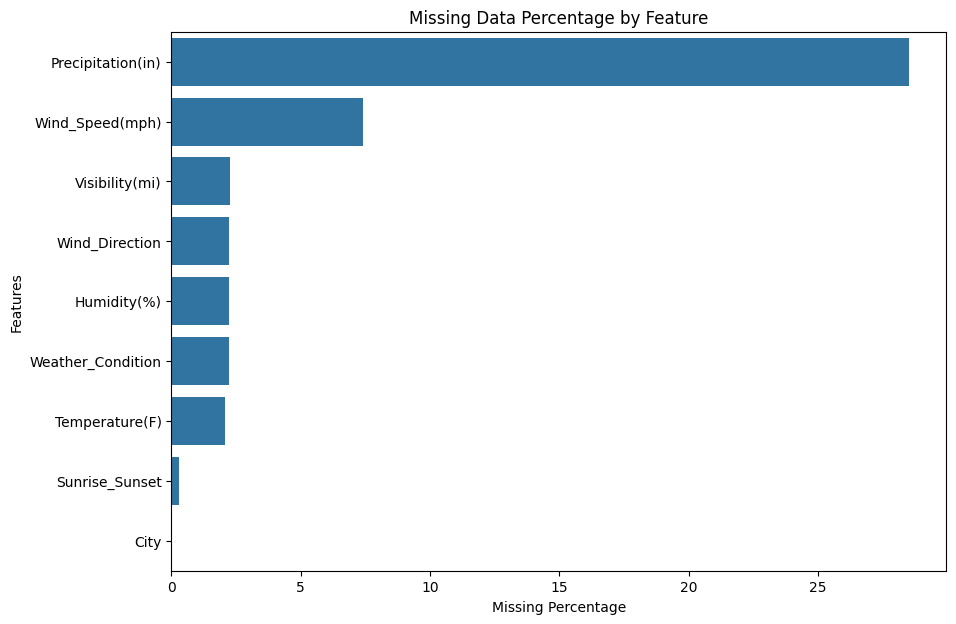

In [134]:
# Plot the missing percentages for all features
plt.figure(figsize=(10, 7))
sns.barplot(x=missing_percent.values, y=missing_percent.index)
plt.xlabel('Missing Percentage')
plt.ylabel('Features')
plt.title('Missing Data Percentage by Feature')
plt.show()

In [135]:
# Shape before dropping
print('Original shape:', df.shape)

# Remove rows where Precipitation(in) is NaN
df_no_precip_nan = df.dropna(subset=['Precipitation(in)'])

# Shape after dropping
print('Shape after removing Precipitation(in) NaNs:', df_no_precip_nan.shape)


Original shape: (500000, 12)
Shape after removing Precipitation(in) NaNs: (357384, 12)


In [136]:
# Missing counts before
print('Missing counts before:')
print(df.isnull().sum())

# Missing counts after
print('\nMissing counts after dropping Precipitation(in) NaNs:')
print(df_no_precip_nan.isnull().sum())


Missing counts before:
Severity                  0
Weather_Condition     11101
Visibility(mi)        11291
Temperature(F)        10466
Humidity(%)           11130
Precipitation(in)    142616
Wind_Speed(mph)       36987
Wind_Direction        11197
Start_Time                0
Sunrise_Sunset         1483
State                     0
City                     19
dtype: int64

Missing counts after dropping Precipitation(in) NaNs:
Severity                0
Weather_Condition    1854
Visibility(mi)       2154
Temperature(F)       1734
Humidity(%)          2280
Precipitation(in)       0
Wind_Speed(mph)      5167
Wind_Direction       3413
Start_Time              0
Sunrise_Sunset       1309
State                   0
City                   17
dtype: int64


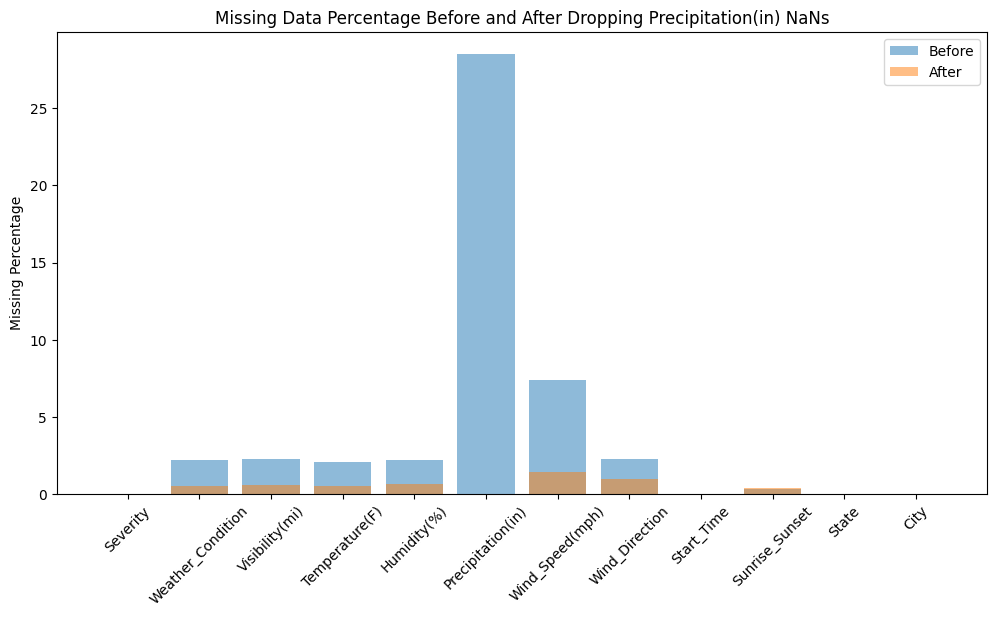

In [137]:


# Before
missing_percent_before = (df.isnull().sum() / len(df)) * 100

# After
missing_percent_after = (df_no_precip_nan.isnull().sum() / len(df_no_precip_nan)) * 100

plt.figure(figsize=(12,6))
plt.bar(missing_percent_before.index, missing_percent_before.values, alpha=0.5, label='Before')
plt.bar(missing_percent_after.index, missing_percent_after.values, alpha=0.5, label='After')
plt.ylabel('Missing Percentage')
plt.xticks(rotation=45)
plt.title('Missing Data Percentage Before and After Dropping Precipitation(in) NaNs')
plt.legend()
plt.show()


In [138]:
df = df.dropna()


In [139]:
print(df.isnull().sum())
print(df.info())
print(df.describe())
display(df.head())
print(df.isnull().sum())
df.shape

Severity             0
Weather_Condition    0
Visibility(mi)       0
Temperature(F)       0
Humidity(%)          0
Precipitation(in)    0
Wind_Speed(mph)      0
Wind_Direction       0
Start_Time           0
Sunrise_Sunset       0
State                0
City                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 347649 entries, 0 to 499999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Severity           347649 non-null  int64  
 1   Weather_Condition  347649 non-null  object 
 2   Visibility(mi)     347649 non-null  float64
 3   Temperature(F)     347649 non-null  float64
 4   Humidity(%)        347649 non-null  float64
 5   Precipitation(in)  347649 non-null  float64
 6   Wind_Speed(mph)    347649 non-null  float64
 7   Wind_Direction     347649 non-null  object 
 8   Start_Time         347649 non-null  object 
 9   Sunrise_Sunset     347649 non-null  object 
 10  State       

,Severity,Weather_Condition,Visibility(mi),Temperature(F),Humidity(%),Precipitation(in),Wind_Speed(mph),Wind_Direction,Start_Time,Sunrise_Sunset,State,City
0,2,Fair,10.0,77.0,62.0,0.0,5.0,NW,2019-06-12 10:10:56,Day,LA,Zachary
1,2,Fair,10.0,45.0,48.0,0.0,5.0,W,2022-12-03 23:37:14.000000000,Night,VA,Sterling
2,2,Fair,10.0,68.0,73.0,0.0,13.0,W,2022-08-20 13:13:00.000000000,Day,CA,Lompoc
3,2,Wintry Mix,10.0,27.0,86.0,0.0,15.0,ENE,2022-02-21 17:43:04,Day,MN,Austin
4,2,Fair,10.0,42.0,34.0,0.0,0.0,CALM,2020-12-04 01:46:00,Night,CA,Bakersfield


Severity             0
Weather_Condition    0
Visibility(mi)       0
Temperature(F)       0
Humidity(%)          0
Precipitation(in)    0
Wind_Speed(mph)      0
Wind_Direction       0
Start_Time           0
Sunrise_Sunset       0
State                0
City                 0
dtype: int64


(347649, 12)

 Exploratory Data Analysis (EDA)

In [140]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
# Drop rows where Start_Time could not be converted
df = df.dropna(subset=['Start_Time'])

In [141]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year
print(df['Start_Time'].dtype)





datetime64[ns]


In [108]:
df.shape
display(df.head())

,Severity,Weather_Condition,Visibility(mi),Temperature(F),Humidity(%),Precipitation(in),Wind_Speed(mph),Wind_Direction,Start_Time,Sunrise_Sunset,State,City,Hour,Weekday,Month
0,2,Fair,10.0,77.0,62.0,0.0,5.0,NW,2019-06-12 10:10:56,Day,LA,Zachary,10,Wednesday,6
3,2,Wintry Mix,10.0,27.0,86.0,0.0,15.0,ENE,2022-02-21 17:43:04,Day,MN,Austin,17,Monday,2
4,2,Fair,10.0,42.0,34.0,0.0,0.0,CALM,2020-12-04 01:46:00,Night,CA,Bakersfield,1,Friday,12
5,2,Fair,10.0,42.0,58.0,0.0,13.0,W,2021-03-29 07:03:58,Day,MA,Peabody,7,Monday,3
6,2,Light Rain,10.0,35.0,89.0,0.0,0.0,CALM,2020-01-14 16:49:23,Day,OR,Gold Hill,16,Tuesday,1


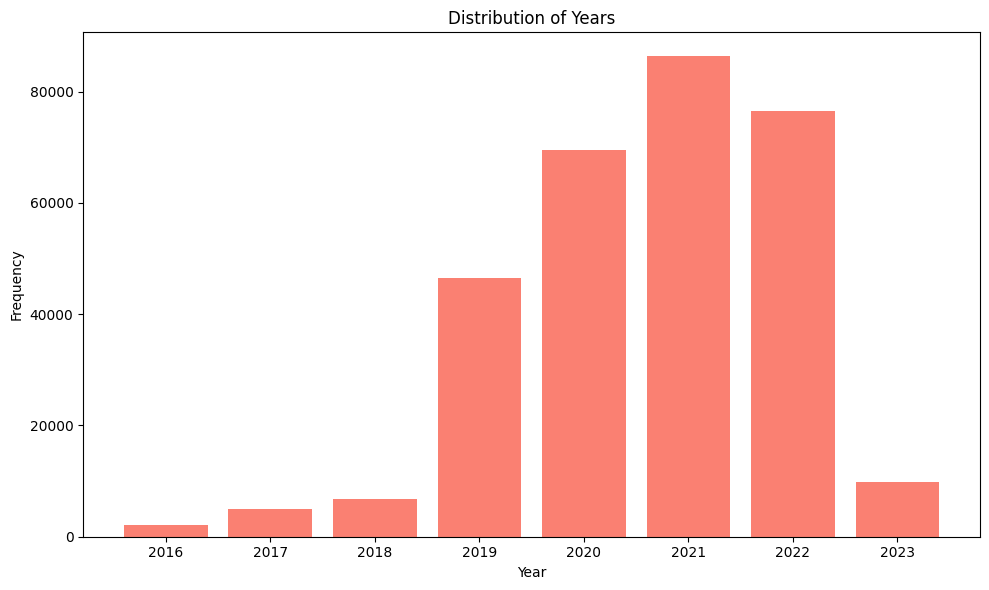

In [156]:
#accident by year
year_frequency = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.bar(year_frequency.index.astype(int), year_frequency.values, color='salmon')
plt.title('Distribution of Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

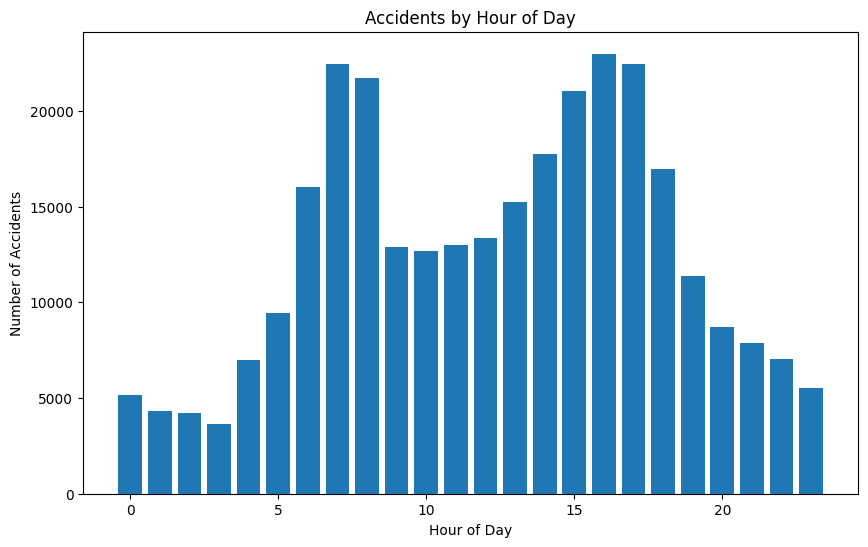

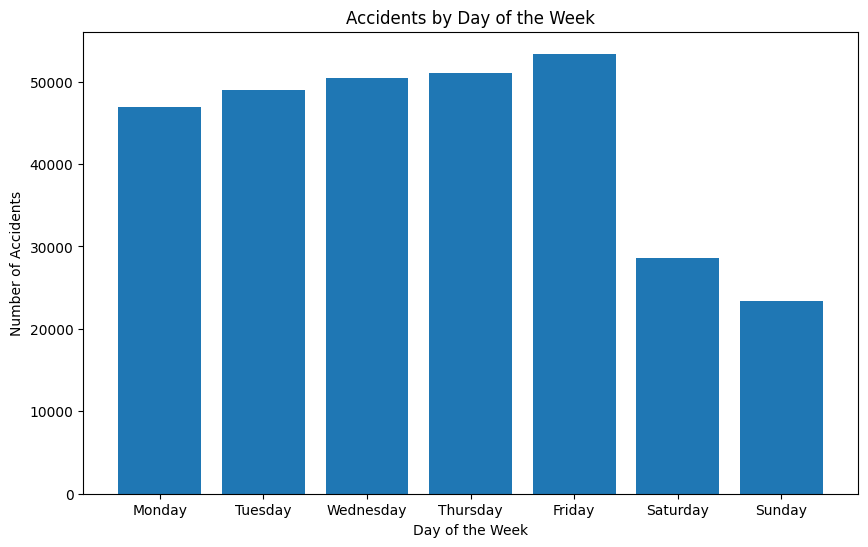

In [172]:


#accident by hour
hour_counts = df['Hour'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.bar(hour_counts.index, hour_counts.values)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Hour of Day')
plt.show()


#accident by week
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = df['Weekday'].value_counts().reindex(weekday_order)

plt.figure(figsize=(10,6))
plt.bar(weekday_counts.index, weekday_counts.values)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Day of the Week')
plt.show()




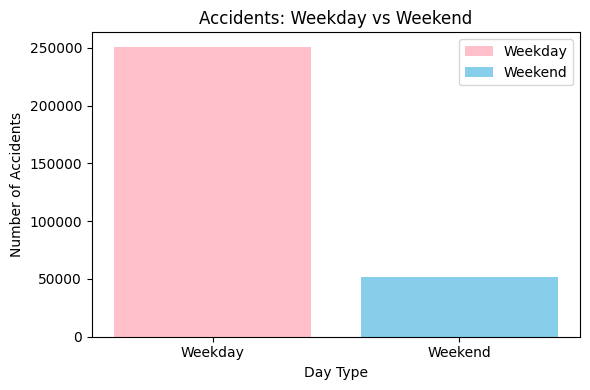

In [168]:
# Add a column that labels each row as 'Weekday' or 'Weekend'
df['DayType'] = df['Weekday'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
import matplotlib.pyplot as plt

# Accident count by day type
daytype_counts = df['DayType'].value_counts()


plt.figure(figsize=(6,4))
bars = plt.bar(daytype_counts.index, daytype_counts.values, color=['pink', 'skyblue'])
plt.xlabel('Day Type')
plt.ylabel('Number of Accidents')
plt.title('Accidents: Weekday vs Weekend')
plt.legend(bars, ['Weekday', 'Weekend'], loc='upper right', frameon=True)

plt.tight_layout()
plt.show()



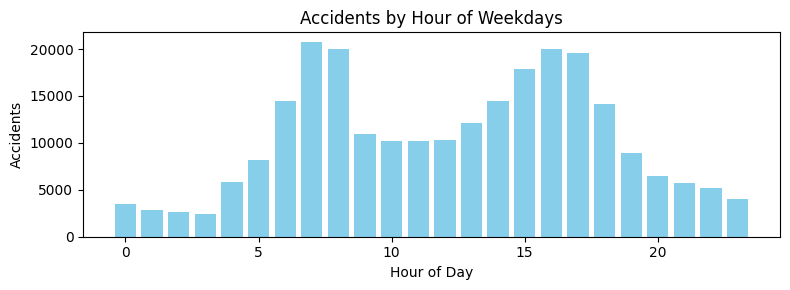

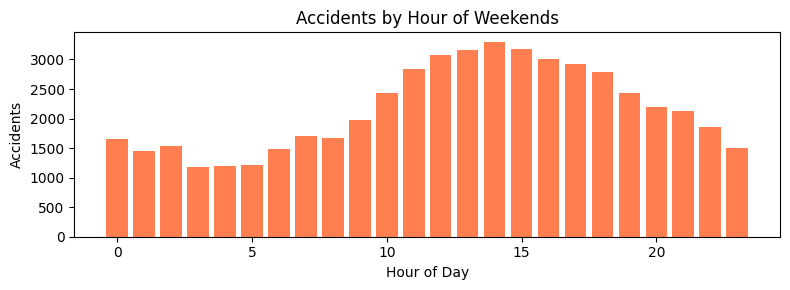

In [164]:

# Accidents by hour for weekdays
weekday_hours = df[df['DayType'] == 'Weekday']['Hour']
weekday_counts = weekday_hours.value_counts().sort_index()

plt.figure(figsize=(8, 3))
plt.bar(weekday_counts.index, weekday_counts.values, color='skyblue')
plt.xlabel('Hour of Day')
plt.ylabel('Accidents')
plt.title('Accidents by Hour of Weekdays')
plt.tight_layout()
plt.show()

# Accidents by hour for weekends
weekend_hours = df[df['DayType'] == 'Weekend']['Hour']
weekend_counts = weekend_hours.value_counts().sort_index()

plt.figure(figsize=(8, 3))
plt.bar(weekend_counts.index, weekend_counts.values, color='coral')
plt.xlabel('Hour of Day')
plt.ylabel('Accidents')
plt.title('Accidents by Hour of Weekends')
plt.tight_layout()
plt.show()



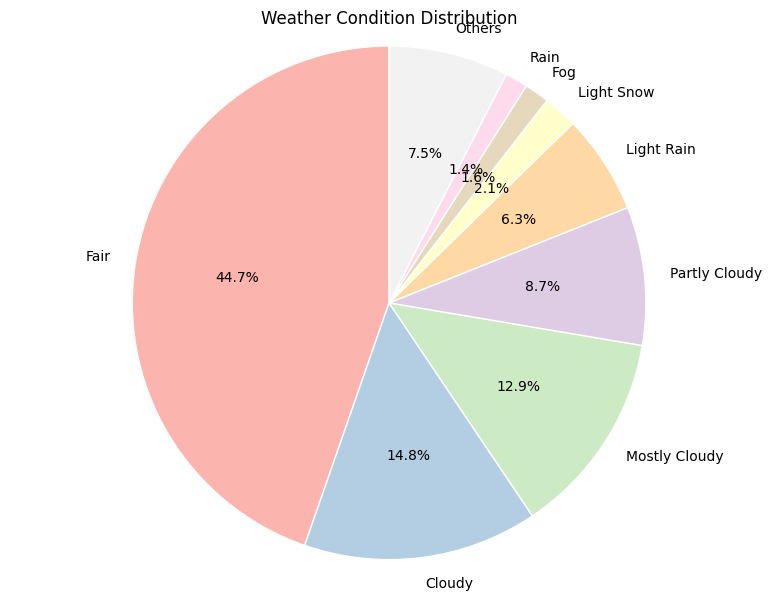

In [194]:


#Count the frequency of each weather condition
weather_counts = df['Weather_Condition'].value_counts()

#Select the top 8 most frequent weather conditions
top_conditions = weather_counts.head(8)

# 3. Group all other less frequent conditions into "Others"
other_conditions_count = weather_counts.iloc[8:].sum()

# 4. Prepare a DataFrame for the pie chart
summary_weather_counts = pd.DataFrame({
    'Weather_Condition': list(top_conditions.index) + ['Others'],
    'Count': list(top_conditions.values) + [other_conditions_count]
})

# 5. Choose a color palette for distinct slices (up to 7 slices)
colors = plt.cm.Pastel1.colors[:len(summary_weather_counts)]

# 6. Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    summary_weather_counts['Count'],
    labels=summary_weather_counts['Weather_Condition'],  # Each weather type
    autopct='%1.1f%%',                                  # Show percentage
    colors=colors,
    startangle=90,                                      # Start from the top
    wedgeprops={'edgecolor': 'white'}                   # White borders for clarity
)
plt.title('Weather Condition Distribution')
plt.axis('equal')   # Equal aspect ratio to make pie round
plt.tight_layout()
plt.show()




“This pattern shows that the proportion of severe accidents (Severity 3 & 4) is higher during Rain and Fog conditions compared to Clear weather.”

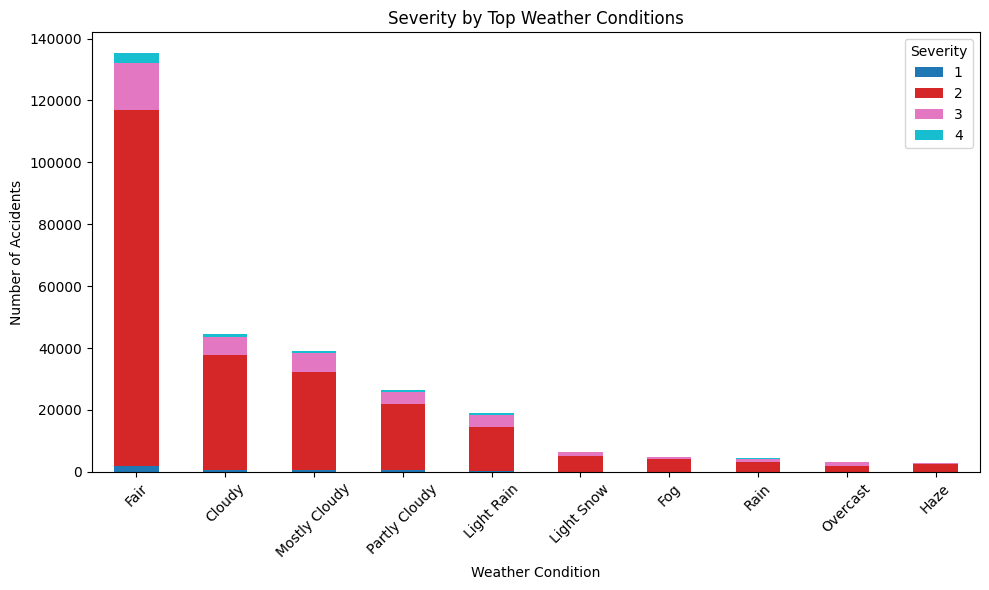

In [195]:

top_weather = df['Weather_Condition'].value_counts().head(10).index
df_top = df[df['Weather_Condition'].isin(top_weather)]
crosstab = pd.crosstab(df_top['Weather_Condition'], df_top['Severity']).reindex(index=top_weather)

crosstab.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab10')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.title('Severity by Top Weather Conditions')
plt.xticks(rotation=45)
plt.legend(title='Severity')
plt.tight_layout()
plt.show()



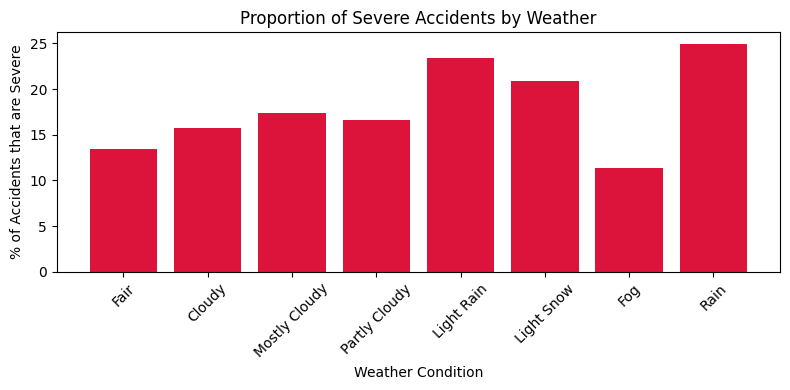

In [210]:
# Define severe as severity 3 or 4
df['Severe'] = df['Severity'].isin([3,4])
proportion_severe = df.groupby('Weather_Condition')['Severe'].mean().sort_values(ascending=False)


top_weather = df['Weather_Condition'].value_counts().head(8).index
proportion_top = proportion_severe.loc[top_weather]

plt.figure(figsize=(8,4))
plt.bar(proportion_top.index, proportion_top.values * 100, color='crimson')
plt.ylabel('% of Accidents that are Severe')
plt.xlabel('Weather Condition')
plt.title('Proportion of Severe Accidents by Weather')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


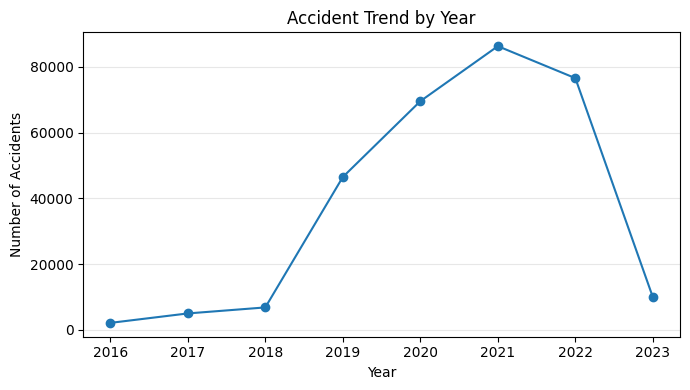

In [202]:
yearly_counts = df.groupby('Year').size()

plt.figure(figsize=(7,4))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Accident Trend by Year')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


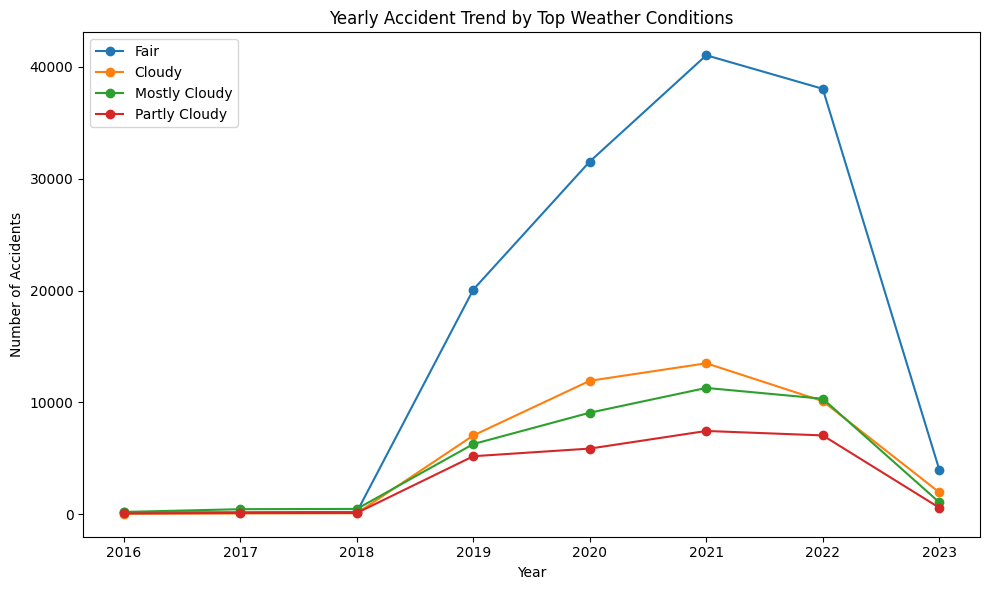

In [203]:
# Find the most frequent weather conditions
top_weather = df['Weather_Condition'].value_counts().head(4).index

plt.figure(figsize=(10,6))
for condition in top_weather:
    yearly_counts = df[df['Weather_Condition'] == condition].groupby('Year').size()
    plt.plot(yearly_counts.index, yearly_counts.values, marker='o', label=condition)

plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Yearly Accident Trend by Top Weather Conditions')
plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipython-input-209-3789214298.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=severity_levels)


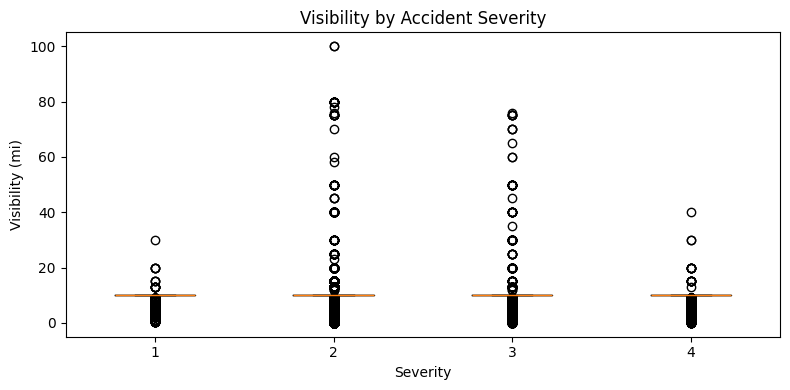

/tmp/ipython-input-209-3789214298.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  visibility_severe = df.groupby('Visibility_bin')['Severe'].mean()


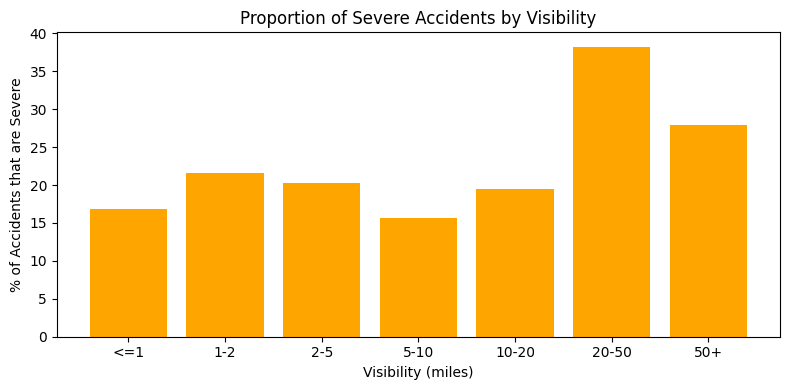

In [209]:
# Prepare data for each severity
severity_levels = sorted(df['Severity'].unique())
data = [df[df['Severity'] == sev]['Visibility(mi)'] for sev in severity_levels]

plt.figure(figsize=(8,4))
plt.boxplot(data, labels=severity_levels)
plt.xlabel('Severity')
plt.ylabel('Visibility (mi)')
plt.title('Visibility by Accident Severity')
plt.tight_layout()
plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Bin visibility (in miles) into categories
bins = [0, 1, 2, 5, 10, 20, 50, 100]
labels = ['<=1', '1-2', '2-5', '5-10', '10-20', '20-50', '50+']
df['Visibility_bin'] = pd.cut(df['Visibility(mi)'], bins=bins, labels=labels, right=True, include_lowest=True)

# Calculate the proportion of severe accidents in each bin
df['Severe'] = df['Severity'].isin([3, 4])
visibility_severe = df.groupby('Visibility_bin')['Severe'].mean()

plt.figure(figsize=(8,4))
plt.bar(visibility_severe.index.astype(str), visibility_severe.values*100, color='orange')
plt.xlabel('Visibility (miles)')
plt.ylabel('% of Accidents that are Severe')
plt.title('Proportion of Severe Accidents by Visibility')
plt.tight_layout()
plt.show()



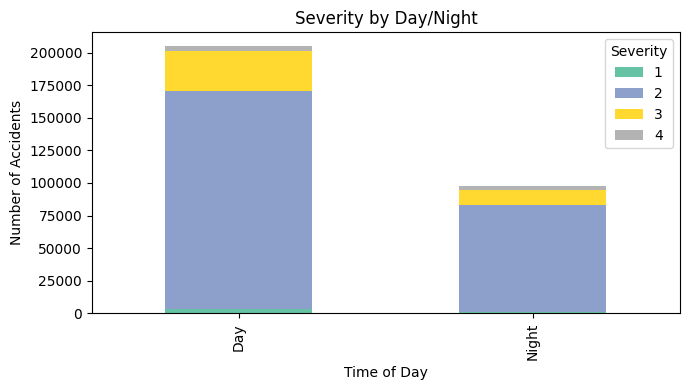

In [206]:
# Make sure Sunrise_Sunset exists and has 'Day'/'Night'
if 'Sunrise_Sunset' in df.columns:
    crosstab_dn = pd.crosstab(df['Sunrise_Sunset'], df['Severity'])

    crosstab_dn.plot(kind='bar', stacked=True, figsize=(7,4), colormap='Set2')
    plt.xlabel('Time of Day')
    plt.ylabel('Number of Accidents')
    plt.title('Severity by Day/Night')
    plt.legend(title='Severity')
    plt.tight_layout()
    plt.show()


/tmp/ipython-input-207-4032306592.py:4: FutureWarning: The provided callable <function mean at 0x7a045b21a3e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot = df_top.pivot_table(index='Weather_Condition', columns='Sunrise_Sunset', values='Severity', aggfunc=np.mean)


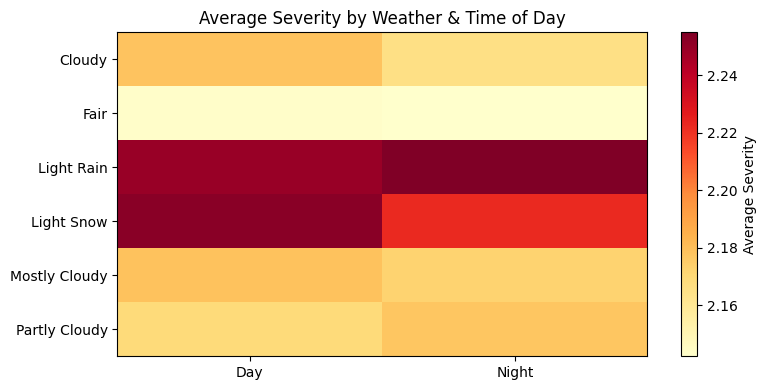

In [207]:
import numpy as np

if 'Sunrise_Sunset' in df.columns:
    pivot = df_top.pivot_table(index='Weather_Condition', columns='Sunrise_Sunset', values='Severity', aggfunc=np.mean)
    plt.figure(figsize=(8,4))
    plt.imshow(pivot, cmap='YlOrRd', aspect='auto')
    plt.colorbar(label='Average Severity')
    plt.xticks(range(len(pivot.columns)), pivot.columns)
    plt.yticks(range(len(pivot.index)), pivot.index)
    plt.title('Average Severity by Weather & Time of Day')
    plt.tight_layout()
    plt.show()


In [208]:
# Proportion of severe accidents (3 & 4) in each weather
df_top['Severe'] = df_top['Severity'].isin([3,4])
proportion_severe = df_top.groupby('Weather_Condition')['Severe'].mean()
print(proportion_severe)


Weather_Condition
Cloudy           0.157266
Fair             0.134770
Light Rain       0.233953
Light Snow       0.209442
Mostly Cloudy    0.173712
Partly Cloudy    0.165946
Name: Severe, dtype: float64


/tmp/ipython-input-208-4173922678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['Severe'] = df_top['Severity'].isin([3,4])


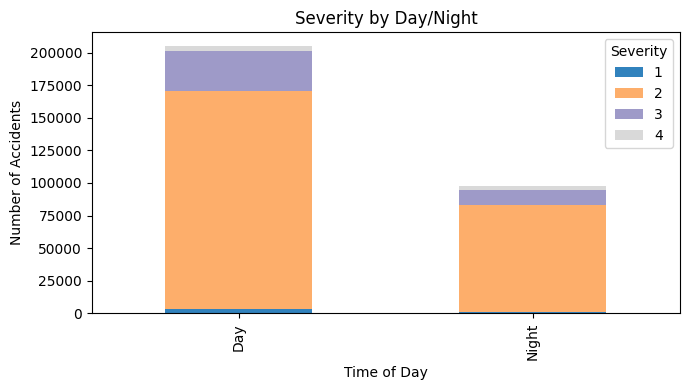

In [181]:
daynight_crosstab = pd.crosstab(df['Sunrise_Sunset'], df['Severity'])
daynight_crosstab.plot(kind='bar', stacked=True, figsize=(7,4), colormap='tab20c')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.title('Severity by Day/Night')
plt.legend(title='Severity')
plt.tight_layout()
plt.show()


In [173]:
df['State'].unique()

array(['LA', 'MN', 'CA', 'MA', 'OR', 'TX', 'IN', 'MT', 'AL', 'AZ', 'FL',
       'VA', 'SC', 'KS', 'NC', 'CO', 'GA', 'PA', 'NY', 'NV', 'NJ', 'TN',
       'IL', 'MS', 'NM', 'UT', 'WA', 'MO', 'OH', 'CT', 'OK', 'MD', 'MI',
       'IA', 'DC', 'WV', 'RI', 'WI', 'AR', 'NH', 'WY', 'KY', 'NE', 'DE',
       'ID', 'ND', 'ME', 'VT', 'SD'], dtype=object)

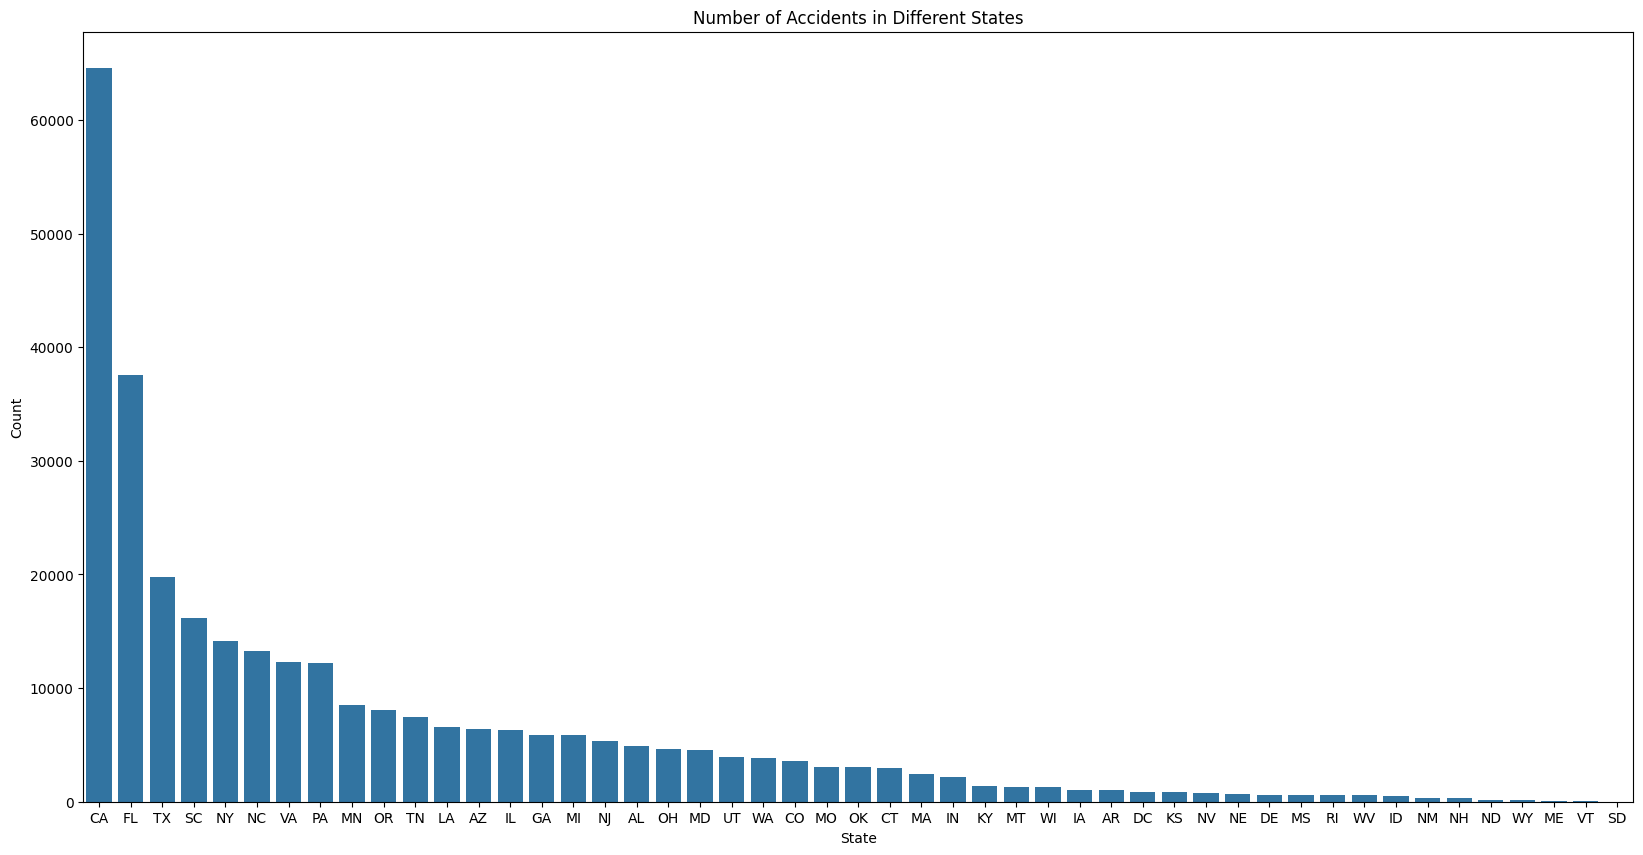

In [174]:
# Analyzing the data by 'State' feature
states = df['State'].value_counts()

# Showing accident in different states by visualization
plt.figure(figsize=(20,10))
sns.barplot(y=states , x = states.index)
plt.title('Number of Accidents in Different States')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

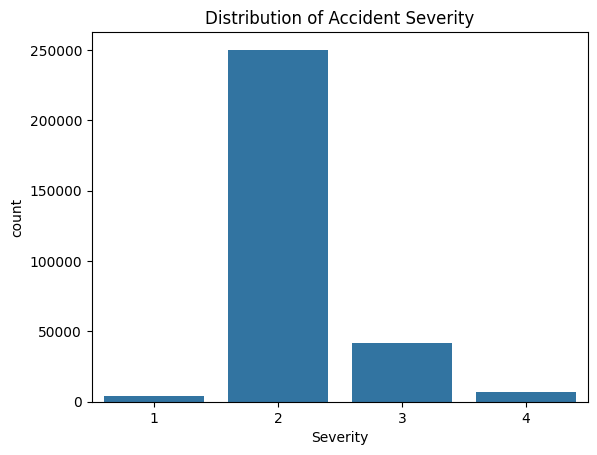

In [175]:
sns.countplot(x='Severity', data=df)
plt.title('Distribution of Accident Severity')
plt.show()


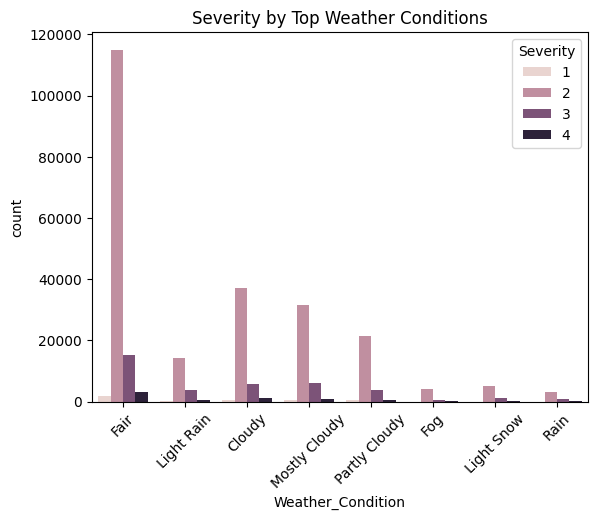

In [110]:
top_weather = df['Weather_Condition'].value_counts().head(8).index
sns.countplot(data=df[df['Weather_Condition'].isin(top_weather)],
              x='Weather_Condition', hue='Severity')
plt.xticks(rotation=45)
plt.title('Severity by Top Weather Conditions')
plt.show()


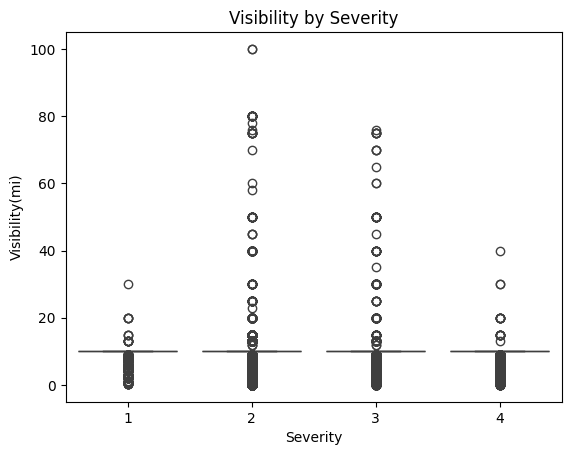

In [111]:
sns.boxplot(x='Severity', y='Visibility(mi)', data=df)
plt.title('Visibility by Severity')
plt.show()


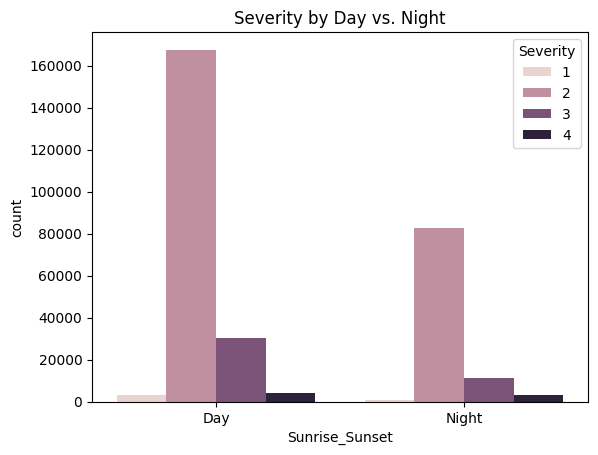

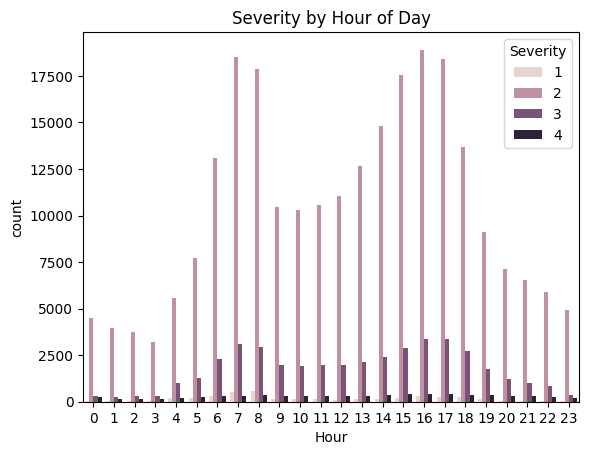

In [112]:
sns.countplot(x='Sunrise_Sunset', hue='Severity', data=df)
plt.title('Severity by Day vs. Night')
plt.show()

sns.countplot(x='Hour', hue='Severity', data=df)
plt.title('Severity by Hour of Day')
plt.show()


In [ ]:
#visualization
#self explanatory \
#relevent to questipn as well
#all the code in git hubb
#readme file in read me file
#install the adn steps

# report in assignmet and github link
#code in github

#public

#initial processing of datat
#part c process to answer the data


#write in comment section as well and put the refrences in the reoort



#######
# explain the data set #identify imp features how it influence your out come
# make a visualuzation for features brief restatement of problem and then explain the datset
# part1 key features less features
# part2 : lcustruuing definr the input and out put relation regressiion or classification 2-3  should have some replation with research question explain the logic
#code comments read me file
#part4 : problem can be narrow down pin point the efficenfy in term the time efficency based on these feature i am going to do these
#


Files already downloaded and verified
Files already downloaded and verified
Using device: cpu
